# Unsupervised Learning

## <a id="navi">Navigation</a>

- [Setup](#setup)
- [Load data](#data)
- [Preprocess](#preprocess)
- [word cloud](#wc)
    - [word clouds by rating](#wc_rating)
- [Clustering](#clustering)
    - [TSNE Visualizations](#clustering_tsne_vis)
    - [Clustering models](#clustering_models)
- [Topic Modeling](#topic_modeling)
    - [Recipes](#topic_modeling_recipes)
    - [Reviews](#topic_modeling_reviews)

## <a id="setup">Setup</a>

[\[↑Navi\]](#navi)

In [ ]:
# https://stackoverflow.com/questions/76586062/wordcloud-attributeerror-transposedfont-object-has-no-attribute-getbbox

In [10]:
# !pip uninstall -y -r requirements.txt

In [1]:
!pip install -U -r unsupervised_learning_requirements.txt

     |████████████████████████████████| 15.7 MB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 103.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 32.8 MB/s  eta 0:00:01
     |████████████████████████████████| 90 kB 48.6 MB/s  eta 0:00:01
     |████████████████████████████████| 489 kB 76.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 49.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 113.3 MB/s eta 0:00:01     |███████▎                        | 1.6 MB 113.3 MB/s eta 0:00:01
     |███████████▌                    | 317.7 MB 96.7 MB/s eta 0:00:065     |███████                         | 193.7 MB 140.3 MB/s eta 0:00:05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████▎       | 672.8 MB 99.9 MB/s eta 0:00:03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 887.0 MB 127.9 MB/s eta 0:00:01     |████████████████████████████████| 887.5 MB 22 kB/s /s eta 0:00:01
     |████████████████████████████████| 24.2 MB 103.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 104.8 MB/s eta 0:00:01
     |████████████████████████████████| 268 kB 126.8 MB/s eta 0:00:01
     |█████████████████▍              | 302.6 MB 129.3 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 557.1 MB 132.2 MB/s eta 0:00:01     |████████████████████████████████| 557.1 MB 28 kB/s 
     |████████████████████████████████| 21.0 MB 101.0 MB/s eta 0:00:01
     |██████████████████████████▏     | 259.6 MB 94.4 MB/s eta 0:00:011

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 849 kB 98.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 97.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 104.6 MB/s eta 0:00:01
     |████████████████████████████████| 761 kB 95.7 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 26.0 MB/s  eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125918 sha256=006a2af15041486c7a3bee580c2882a5f14b8a0264fa10aff439fe2becda12bb
  Stored in directory: /home/jovyan/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86845 sha256=675e8ef07a477b109d38072b1586535e53c017d75f46740ebc99149588fbdd9b
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/79/0f/1b79a5dc9ecd14e8b75741d65f860cbbe3a4534cf16e8cb80c
Successfully built sentence-transformers umap-learn
  Attempting uninstall: numpy
    F

In [3]:
# %%bash
# pip install --upgrade numpy
# pip install --upgrade Pillow
# pip install --upgrade sklearn
# pip install wordcloud
# pip install fastparquet
# !pip install umap-learn

In [5]:
# !pip install "importlib-metadata<5.0"

In [44]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

## <a id="data">Load data</a>

[\[↑Navi\]](#navi)

In [8]:
!ls data

embeddings
NewspaperPersonalUseSemiExpandedRegular-7B0GB.ttf
recipes.csv
recipes_extended4.csv
recipes.parquet
recipes_wStringKeywords.parquet
reviews.csv
reviews.parquet
TruenoBold-XYE2.otf
word2vec10.parquet


In [5]:
recipes_df = pd.read_parquet("data/recipes_wStringKeywords.parquet")

In [6]:
recipes_df = recipes_df[recipes_df.RecipeCategory.notna()]
recipes_df = recipes_df[recipes_df.Keywords_string.notna()]

In [7]:
recipes_df.shape

(505280, 29)

In [9]:
recipes_df.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       80726
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                     0
Keywords                           0
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating              242321
ReviewCount                   236771
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                177310
RecipeYield                   335715
R

In [205]:
recipes_df.Keywords.str.startswith("c(").sum()

0.0

In [57]:
recipes_df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'Keywords_string', 'Keywords_filtered', 'Keywords_filtered_string',
       'TotalTimeSec', 'TotalTimeMins', 'PrepTimeSec', 'PrepTimeMins',
       'NumImages', 'LenRecipeInstructions', 'NumIngredients'],
      dtype='object')

In [82]:
reviews_df = pd.read_parquet("data/reviews.parquet")

In [83]:
reviews_df.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

In [7]:
reviews_df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00,2000-01-25 21:44:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59,2001-10-17 16:49:59
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00,2000-02-25 09:00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00,2000-03-13 21:15:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00,2000-03-28 12:51:00


## <a id="preprocess">Preprocess data</a>

[\[↑Navi\]](#navi)

### remove None from keywords

In [212]:
none_set = set([None])

In [213]:
recipes_df["Keywords"] = recipes_df.Keywords.apply(lambda l: [kw for kw in l if kw not in none_set])

In [216]:
recipes_df["Keywords_string"] = recipes_df.Keywords.apply(lambda l: " ".join(l))
recipes_df["Keywords_string"] = recipes_df["Keywords_string"].replace("", np.nan)

In [218]:
recipes_df.Keywords_string.isna().sum()

17237

In [217]:
recipes_df.to_parquet("data/recipes_wStringKeywords.parquet")

In [21]:
recipes_df.to_csv("data/recipes_wStringKeywords.csv", index=False)

### filter keywords

In [8]:
recipe_cat_to_ignore = set(['Snacks', 'One', 'Dish', 'Lunch', 'Dessert'])

In [9]:
recipe_kw_to_ignore = set(['Hours', 'Low', 'Mins', 'Easy', 'Cook'])
recipe_kw_to_ignore.update(["Healthy", 'Meat', 'Vegetable'])
recipe_kw_to_ignore.update(["Oven"])

In [10]:
recipe_kw_to_ignore.update(["Protein", "Cholesterol", "Inexpensive", "Beginner", "Fruit", "C"])

In [11]:
recipes_df["Keywords_filtered"] = recipes_df.Keywords.apply(lambda l: [kw for kw in l if kw not in recipe_kw_to_ignore])

In [12]:
recipes_df["Keywords_filtered_string"] = recipes_df.Keywords_filtered.apply(lambda l: " ".join(l))

### get numerical features

In [13]:
recipes_df["TotalTimeSec"] = pd.to_timedelta(recipes_df.TotalTime, errors='coerce')
recipes_df["TotalTimeMins"] = recipes_df.TotalTimeSec.dt.total_seconds() / 60

recipes_df["PrepTimeSec"] = pd.to_timedelta(recipes_df.PrepTime, errors='coerce')
recipes_df["PrepTimeMins"] = recipes_df.PrepTimeSec.dt.total_seconds() / 60

In [14]:
cols_to_filter = ['Keywords_string', 'RecipeInstructions', 'TotalTimeMins', 'Images', 
                  'RecipeCategory', 
                  'RecipeIngredientParts', 'RecipeServings', 'PrepTimeMins'
                 ]

In [15]:
recipes_df = recipes_df.dropna(subset=cols_to_filter)

In [16]:
recipes_df["NumImages"] = recipes_df.Images.apply(len)

In [17]:
recipes_df["LenRecipeInstructions"] = recipes_df.RecipeInstructions.apply(len)

In [18]:
recipes_df["NumIngredients"] = recipes_df.RecipeIngredientParts.apply(len)

In [19]:
recipes_df.shape

(327640, 38)

### aggregate half stars

In [20]:
# filter out nan ratings
recipes_df = recipes_df.dropna(subset=['AggregatedRating'])

In [21]:
recipes_df.AggregatedRating.value_counts()

5.0    108016
4.0     27257
4.5     21779
3.0      5809
3.5      2479
2.0      1287
1.0      1017
2.5       401
1.5        39
Name: AggregatedRating, dtype: int64

In [22]:
recipes_df['AggregatedRating'] = recipes_df.AggregatedRating.astype(int)

In [23]:
recipes_df.AggregatedRating.astype(int).value_counts()

5    108016
4     49036
3      8288
2      1688
1      1056
Name: AggregatedRating, dtype: int64

## <a id="wc">word cloud</a>

[\[↑Navi\]](#navi)

In [15]:
def create_word_cloud(df, col_name='Keywords', coloring='inferno', stop_words=recipe_kw_to_ignore, random_seed=0):
    recipes_keywords = df[col_name].astype(str).to_list()

    #Instantiate wordcloud object and use method to feed it our corpus
    wc = WordCloud(max_words=50,
                   font_path="data/TruenoBold-XYE2.otf",
                   colormap=coloring,
                   collocations=False,
                   stopwords=stop_words,
                   background_color="white",
                   random_state=random_seed
                  ).generate_from_text(", ".join(recipes_keywords))
    return wc

def plot_word_cloud(wc):
    #Use matplotlib.pyplot to display the fitted wordcloud
    #Turn axis off to get rid of axis numbers
    plt.figure(figsize=(10,8)) #plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

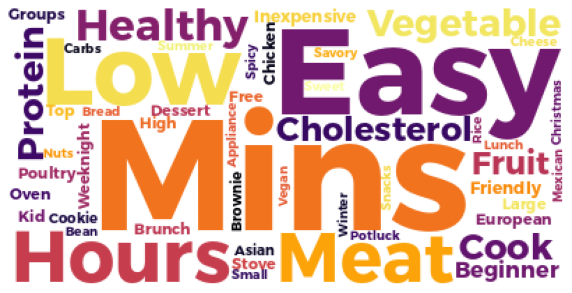

In [23]:
plot_word_cloud(create_word_cloud(recipes_df, col_name='Keywords_string', stop_words=None, random_seed=110))

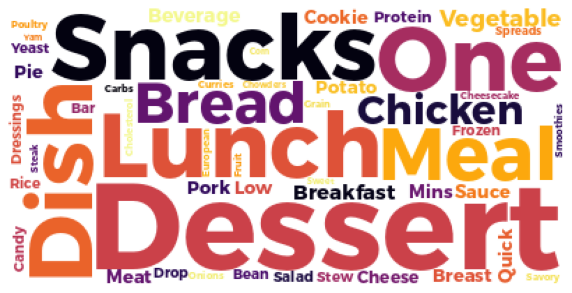

In [17]:
plot_word_cloud(create_word_cloud(recipes_df, col_name='RecipeCategory', stop_words=None, random_seed=42))

In [6]:
recipe_cat_to_ignore = set(['Snacks', 'One', 'Dish', 'Lunch', 'Dessert'])

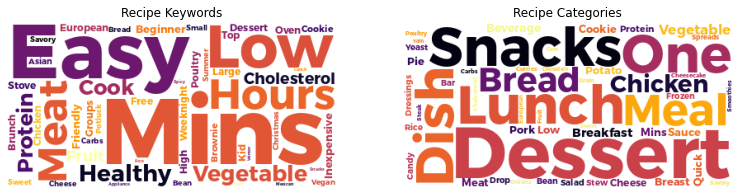

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
ax[0].set_title("Recipe Keywords")
ax[0].imshow(create_word_cloud(recipes_df, col_name='Keywords_string', stop_words=None, random_seed=11))
ax[0].axis('off')
ax[1].set_title("Recipe Categories")
ax[1].imshow(create_word_cloud(recipes_df, col_name='RecipeCategory', stop_words=None, random_seed=42))
ax[1].axis('off')

plt.show();

In [56]:
recipe_kw_to_ignore = set(['Hours', 'Low', 'Mins', 'Easy', 'Cook'])
recipe_kw_to_ignore.update(["Healthy", 'Meat', 'Vegetable'])
recipe_kw_to_ignore.update(["Oven"])

In [16]:
recipe_kw_to_ignore

{'Cook',
 'Easy',
 'Healthy',
 'Hours',
 'Low',
 'Meat',
 'Mins',
 'Oven',
 'Vegetable'}

### <a id="wc_rating">word clouds by rating</a>

[\[↑Navi\]](#navi)

In [58]:
recipes_df.AggregatedRating.value_counts()

5    170301
4     75424
3     12850
2      2667
1      1717
Name: AggregatedRating, dtype: int64

In [59]:
recipe_kw_to_ignore.update(["Protein", "Cholesterol", "Inexpensive", "Beginner", "Fruit", "C"])

In [60]:
recipe_kw_to_ignore

{'Beginner',
 'C',
 'Cholesterol',
 'Cook',
 'Easy',
 'Fruit',
 'Healthy',
 'Hours',
 'Inexpensive',
 'Low',
 'Meat',
 'Mins',
 'Oven',
 'Protein',
 'Vegetable'}

In [62]:
recipes_copy_df = recipes_df.copy()
recipes_copy_df["Keywords_filtered"] = recipes_copy_df.Keywords.apply(lambda l: [kw for kw in l if kw not in recipe_kw_to_ignore])

In [63]:
wc_5 = create_word_cloud(recipes_copy_df[recipes_df.AggregatedRating == 4.0], col_name='Keywords_string', coloring='Greens_r', stop_words=recipe_kw_to_ignore)
wc_3 = create_word_cloud(recipes_copy_df[recipes_df.AggregatedRating == 3.0], col_name='Keywords_string', coloring='Blues', stop_words=recipe_kw_to_ignore)
wc_1 = create_word_cloud(recipes_copy_df[recipes_df.AggregatedRating == 2.0], col_name='Keywords_string', coloring='Reds', stop_words=recipe_kw_to_ignore)
wc_na = create_word_cloud(recipes_copy_df[recipes_df.AggregatedRating == 1.0], col_name='Keywords_string', coloring='Greys', stop_words=recipe_kw_to_ignore)

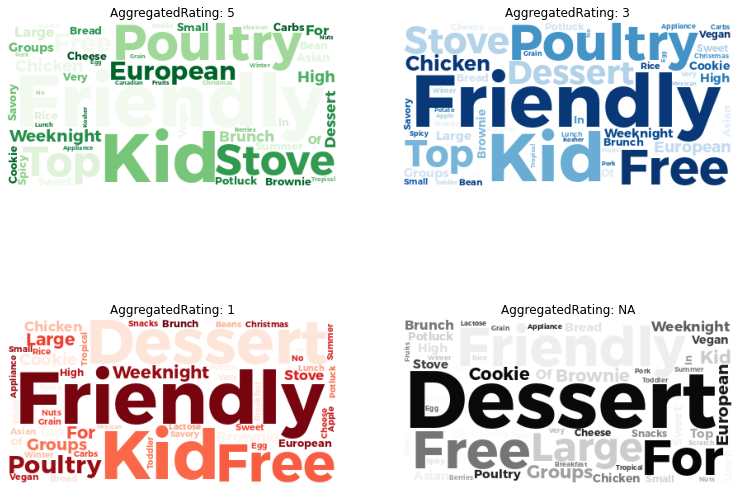

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(13,10))
ax[0,0].set_title("AggregatedRating: 5")
ax[0,0].imshow(wc_5)
ax[0,0].axis('off')
ax[0,1].set_title("AggregatedRating: 3")
ax[0,1].imshow(wc_3)
ax[0,1].axis('off')
ax[1,0].set_title("AggregatedRating: 1")
ax[1,0].imshow(wc_1)
ax[1,0].axis('off')
ax[1,1].set_title("AggregatedRating: NA")
ax[1,1].imshow(wc_na)
ax[1,1].axis('off')

plt.show();

## <a id="clustering">Clustering</a>

[\[↑Navi\]](#navi)

In [24]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.manifold import TSNE
# import umap.umap_ as umap

In [6]:
!ls -F data

embeddings					   reviews.csv
NewspaperPersonalUseSemiExpandedRegular-7B0GB.ttf  reviews.parquet
recipes.csv					   TruenoBold-XYE2.otf
recipes_extended4.csv				   word2vec10.parquet
recipes.parquet


In [5]:
recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4,None,"[Mix everything together and bring to a boil.,..."


In [16]:
recipes_df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'Keywords_string', 'Keywords_filtered', 'Keywords_filtered_string',
       'TotalTimeSec', 'TotalTimeMins', 'NumImages', 'LenRecipeInstructions'],
      dtype='object')

In [27]:
recipes_df.AggregatedRating.value_counts()

5    108016
4     49036
3      8288
2      1688
1      1056
Name: AggregatedRating, dtype: int64

In [25]:
recipes_subset_df = recipes_df[recipes_df.AggregatedRating == 5.0].sample(frac=0.02, random_state=0)

In [26]:
recipes_subset_df.shape

(2160, 38)

In [27]:
recipes_subset_df = pd.concat([recipes_subset_df, recipes_df[recipes_df.AggregatedRating < 2.0]])

In [29]:
recipes_subset_df["Keywords_filtered_string"] = recipes_subset_df.Keywords_filtered_string.replace("", np.nan)
recipes_subset_df = recipes_subset_df.dropna(subset=["Keywords_filtered_string"])

In [30]:
recipes_subset_df.shape

(3149, 38)

In [42]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [31]:
def get_embeddings_for_sent_trans(model, df, col_labels=['Keywords'], id_col="RecipeId", fp_to_save=None):
    id_list = [] #df[id_col]
    input_list = []
    df = df[col_labels + [id_col]].dropna()
    
    for _,row in df.iterrows():
        id_list.append(row[id_col])
        model_input_dict = row[col_labels].to_dict()
        model_input = " ".join(model_input_dict.values())
#         print(model_input)
        input_list.append(model_input)
    
    embeddings = model.encode(input_list)
    
    df_w_emb = pd.DataFrame({id_col: id_list, "embedding": list(embeddings)})
    if fp_to_save:
        df_w_emb.to_json(fp_to_save, orient='records', lines=True)
        print("Saved embeddings to: ", fp_to_save)
    return df_w_emb

def get_embeddings_for_word2vec(model, df, col_labels=['Keywords'], id_col="RecipeId", 
                                fp_to_save=None, ret_emb=False):
    id_list = [] #df[id_col]
    emb_list = []
    df = df[col_labels + [id_col]].dropna()
    
    for _,row in df.iterrows():
        id_list.append(row[id_col])
        model_input_dict = row[col_labels].to_dict()
        model_input = " ".join(model_input_dict.values())
        emb = np.sum(get_word2vec_embeddings(model, model_input), axis=0)
#         emb = np.expand_dims(emb, axis=0)
#         print(emb.shape)
        emb_list.append(emb)

    df_w_emb = pd.DataFrame({id_col: id_list, "embedding": list(np.vstack(emb_list))})
    if fp_to_save:
        df_w_emb.to_json(fp_to_save, orient='records', lines=True)
        print("Saved embeddings to: ", fp_to_save)
    if ret_emb:
        return np.array(emb_list)
    return df_w_emb

In [32]:
def get_np_embeddings_from_pandas(emb_series, embedding_col=None):
    if embedding_col:
        emb_series = emb_series[embedding_col]
    return np.array(emb_series.apply(np.array).to_list())

In [35]:
fp = "data/embeddings/w2v_name_filteredKW_subset.jsonl"

In [44]:
recipes_subset_df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'Keywords_string', 'Keywords_filtered', 'Keywords_filtered_string',
       'TotalTimeSec', 'TotalTimeMins', 'PrepTimeSec', 'PrepTimeMins',
       'NumImages', 'LenRecipeInstructions', 'NumIngredients'],
      dtype='object')

In [69]:
df_w_emb = get_embeddings_for_word2vec(w2v, recipes_subset_df, 
                                         col_labels=["Name", "RecipeCategory", "Keywords_filtered_string"], fp_to_save=fp)

Saved embeddings to:  data/embeddings/w2v_name_category_filteredKW_subset.jsonl


In [70]:
w2v_embeddings = get_np_embeddings_from_pandas(df_w_emb, "embedding")
w2v_embeddings.shape

(3149, 300)

In [71]:
df_w_emb = get_embeddings_for_sent_trans(model, recipes_subset_df, 
                                         col_labels=["Name", "RecipeCategory", "Keywords_filtered_string"], fp_to_save=None)

In [72]:
sent_trans_embeddings = get_np_embeddings_from_pandas(df_w_emb, "embedding")
sent_trans_embeddings.shape

(3149, 384)

In [36]:
w2v_embeddings = pd.read_json(fp, orient='records', lines=True)
w2v_embeddings = w2v_embeddings[w2v_embeddings.RecipeId.isin(recipes_subset_df.RecipeId)]["embedding"]
w2v_embeddings = np.array(w2v_embeddings.apply(np.array).to_list())
w2v_embeddings.shape

(3149, 300)

In [34]:
sent_trans_embeddings = pd.read_json(fp, orient='records', lines=True)
sent_trans_embeddings = sent_trans_embeddings[sent_trans_embeddings.RecipeId.isin(recipes_subset_df.RecipeId)]["embedding"]
sent_trans_embeddings = np.array(sent_trans_embeddings.apply(np.array).to_list())
sent_trans_embeddings.shape

(3149, 384)

In [37]:
num_cols = ['LenRecipeInstructions', #'PrepTimeMins', 
            'TotalTimeMins', #'NumIngredients', 'RecipeServings', 
            'NumImages', 
            'ReviewCount']

In [74]:
embeddings = np.hstack([recipes_subset_df[num_cols].to_numpy(), sent_trans_embeddings])
# print(len(num_cols))
# embeddings = recipes_subset_df[num_cols]
# embeddings = (embeddings - embeddings.mean()) / embeddings.std()
# embeddings = embeddings.to_numpy()
embeddings.shape

(3149, 391)

In [38]:
embeddings_wv = np.hstack([recipes_subset_df[num_cols].to_numpy(), w2v_embeddings])
embeddings_st = np.hstack([recipes_subset_df[num_cols].to_numpy(), sent_trans_embeddings])

### <a id="clustering_tsne_vis">TSNE Visualizations</a>

[\[↑Navi\]](#navi)

In [48]:
def perform_tsne(emb_list, random_seed=0, perplexity=30):
    tsne_vec_list = []
    
    for emb in emb_list:
        tsne_vec = TSNE(n_components=2, random_state=random_seed, perplexity=perplexity).fit_transform(emb)
        tsne_vec_list.append(tsne_vec)
    return tsne_vec_list

In [49]:
tsnes = perform_tsne([
    w2v_embeddings,
    embeddings_wv,
    sent_trans_embeddings,
    embeddings_st,
    recipes_subset_df[num_cols].to_numpy()
])

vecs_tsne1,vecs_tsne2,vecs_tsne3,vecs_tsne4,vecs_tsne5 = tsnes

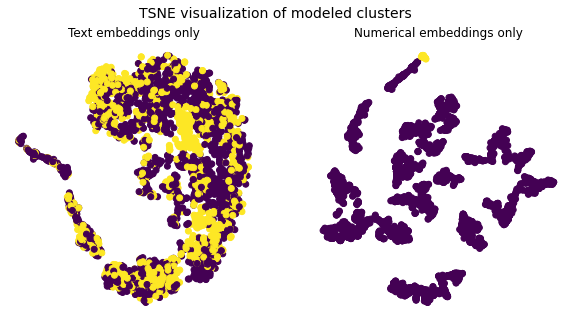

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
curr_ax = ax[0]
curr_ax.set_title("Text embeddings only")
curr_ax.scatter(vecs_tsne2[:,0], vecs_tsne2[:,1], c=st_cluster_ids)
curr_ax.axis('off')

curr_ax = ax[1]
curr_ax.set_title("Numerical embeddings only")
curr_ax.scatter(vecs_tsne5[:,0], vecs_tsne5[:,1], c=num_cluster_ids)
curr_ax.axis('off')

fig.suptitle("TSNE visualization of modeled clusters \n", fontsize=14)
# plt.legend()
plt.show();

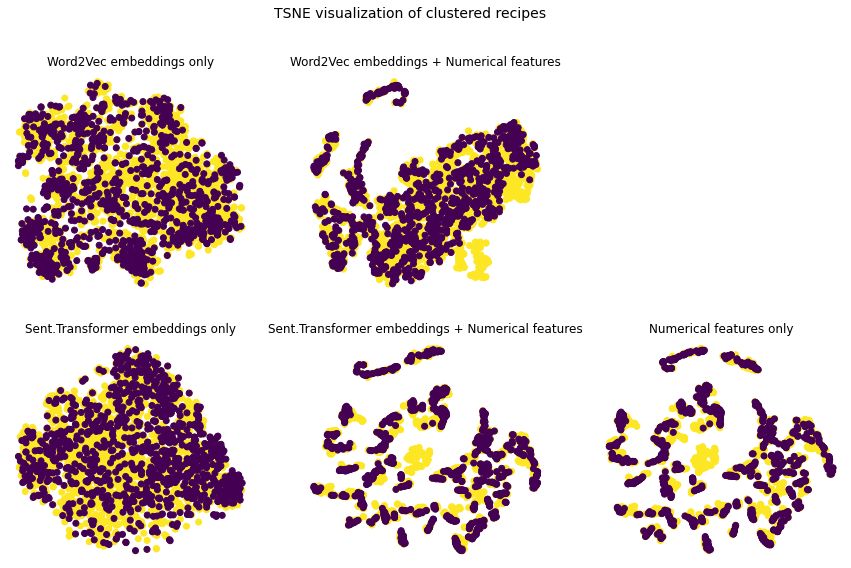

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,9))
curr_ax = ax[0,0]
curr_ax.set_title("Word2Vec embeddings only")
curr_ax.scatter(vecs_tsne1[:,0], vecs_tsne1[:,1], c=(recipes_subset_df.AggregatedRating == 5.0).astype(int))
curr_ax.axis('off')

curr_ax = ax[0,1]
curr_ax.set_title("Word2Vec embeddings + Numerical features")
curr_ax.scatter(vecs_tsne2[:,0], vecs_tsne2[:,1], c=(recipes_subset_df.AggregatedRating == 5.0).astype(int))
curr_ax.axis('off')

curr_ax = ax[0,2]
curr_ax.axis('off')

curr_ax = ax[1,0]
curr_ax.set_title("Sent.Transformer embeddings only")
curr_ax.scatter(vecs_tsne3[:,0], vecs_tsne3[:,1], c=(recipes_subset_df.AggregatedRating == 5.0).astype(int))
curr_ax.axis('off')

curr_ax = ax[1,1]
curr_ax.set_title("Sent.Transformer embeddings + Numerical features")
curr_ax.scatter(vecs_tsne4[:,0], vecs_tsne4[:,1], c=(recipes_subset_df.AggregatedRating == 5.0).astype(int))
curr_ax.axis('off')

curr_ax = ax[1,2]
curr_ax.set_title("Numerical features only")
curr_ax.scatter(vecs_tsne5[:,0], vecs_tsne5[:,1], c=(recipes_subset_df.AggregatedRating == 5.0).astype(int))
curr_ax.axis('off')

fig.suptitle("TSNE visualization of clustered recipes \n", fontsize=14)
# plt.legend()
plt.show();

### <a id="clustering_models">Fit Clustering models</a>

[\[↑Navi\]](#navi)

In [4]:
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram

In [39]:
from sklearn.metrics.cluster import normalized_mutual_info_score, homogeneity_completeness_v_measure, \
adjusted_rand_score,calinski_harabasz_score

In [40]:
def calculate_cluster_purity(cluster_ids, truth_df):
    assert len(cluster_ids) == len(truth_df)
    num_points = len(cluster_ids)
    conf_mat = np.zeros((2,2))
    
    for i in range(num_points):
        c_id = cluster_ids[i]
        label = int(truth_df.iloc[i]['AggregatedRating'] == 5.0)
        conf_mat[c_id][label] = conf_mat[c_id][label] + 1
    print(conf_mat)
    
    return np.sum(np.max(conf_mat, axis=1)) / num_points

In [41]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def perform_clustering(embeddings, num_clusters=2):
    kmeans_clustering = KMeans(n_clusters=2,random_state=0)
    cluster_pred = kmeans_clustering.fit_predict(embeddings)
    return cluster_pred

def get_clustering_metrics(cluster_ids, truth_df, features=None):
    cluster_metrics = {}
    c_sizes = (np.sum(cluster_ids), np.sum(1-cluster_ids))
    cluster_metrics["size ratio"] = min(c_sizes)/max(c_sizes)
    
    c_purity = calculate_cluster_purity(cluster_ids, truth_df)
    cluster_metrics["purity"] = c_purity

    true_cluster_labels = (truth_df.AggregatedRating == 5).astype(int)
    
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_cluster_labels, cluster_ids)
    cluster_metrics["v_measure"] = v_measure
    cluster_metrics["homogeneity"] = homogeneity
    cluster_metrics["completeness"] = completeness
    
    cluster_metrics["RI"] = adjusted_rand_score(true_cluster_labels, cluster_ids)
    
    if features is not None:
        cluster_metrics["Calinski Harabasz"] = calinski_harabasz_score(features, cluster_ids)
    
    for k,v in cluster_metrics.items():
        print(k, " : ", v)
    print("\n ============ \n")

In [46]:
emb_list = [w2v_embeddings, sent_trans_embeddings, 
            embeddings_wv, embeddings_st, 
            recipes_subset_df[num_cols].to_numpy()]

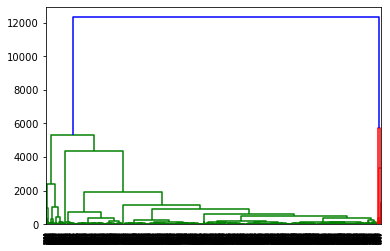

In [45]:
plt.figure()
dendrogram(ward(embeddings_wv))
plt.show();

In [50]:
st_cluster_ids = KMeans(n_clusters=2,random_state=0).fit_predict(sent_trans_embeddings)

In [56]:
num_cluster_ids = KMeans(n_clusters=2,random_state=0).fit_predict(recipes_subset_df[num_cols].to_numpy())

In [51]:
w2v_cluster_ids = AgglomerativeClustering().fit_predict(w2v_embeddings)

In [57]:
# emb_list = [w2v_embeddings, sent_trans_embeddings, 
#             embeddings_wv, embeddings_st, 
#             recipes_subset_df[num_cols].to_numpy()]
for emb in emb_list:
    cluster_ids = KMeans(n_clusters=2,random_state=0).fit_predict(emb)
    get_clustering_metrics(cluster_ids, recipes_subset_df, emb)

[[ 653. 1367.]
 [ 380.  749.]]
size ratio  :  0.558910891089109
purity  :  0.6719593521752938
v_measure  :  0.00014360949100663162
homogeneity  :  0.00014585439701809795
completeness  :  0.00014143264207439824
RI  :  0.002298393022338967
Calinski Harabasz  :  585.508799075853


[[ 504. 1431.]
 [ 529.  685.]]
size ratio  :  0.6273901808785529
purity  :  0.6719593521752938
v_measure  :  0.025119967330566918
homogeneity  :  0.025793222623379335
completeness  :  0.024480964626310886
RI  :  0.053828452929044535
Calinski Harabasz  :  165.71135619782515


[[1022. 2097.]
 [  11.   19.]]
size ratio  :  0.009618467457518435
purity  :  0.6719593521752938
v_measure  :  9.308579097080668e-05
homogeneity  :  5.050119600323307e-05
completeness  :  0.0005938083470112741
RI  :  0.001111244425038241
Calinski Harabasz  :  3587.119606536837


[[1022. 2097.]
 [  11.   19.]]
size ratio  :  0.009618467457518435
purity  :  0.6719593521752938
v_measure  :  9.308579097080668e-05
homogeneity  :  5.05011960032330

In [54]:
# emb_list = [sent_trans_embeddings, embeddings, recipes_subset_df[num_cols].to_numpy()]
for emb in emb_list:
    cluster_ids = AgglomerativeClustering().fit_predict(emb)
    get_clustering_metrics(cluster_ids, recipes_subset_df, emb)

[[ 474.  837.]
 [ 559. 1279.]]
size ratio  :  0.7132752992383025
purity  :  0.6719593521752938
v_measure  :  0.00275965020307539
homogeneity  :  0.002860599404522922
completeness  :  0.0026655830370956196
RI  :  0.009300961902557423
Calinski Harabasz  :  435.5247583350342


[[ 882. 1835.]
 [ 151.  281.]]
size ratio  :  0.1589988958410011
purity  :  0.6719593521752938
v_measure  :  0.00031990051513390035
homogeneity  :  0.00026101467719498255
completeness  :  0.0004130965675135757
RI  :  0.0062864469786480534
Calinski Harabasz  :  138.2380704992009


[[1030. 2107.]
 [   3.    9.]]
size ratio  :  0.003825310806503028
purity  :  0.6719593521752938
v_measure  :  0.00016846420848194368
homogeneity  :  8.756381061355488e-05
completeness  :  0.0022137857297488514
RI  :  -0.0009222646177426704
Calinski Harabasz  :  3027.719945125685


[[1030. 2107.]
 [   3.    9.]]
size ratio  :  0.003825310806503028
purity  :  0.6719593521752938
v_measure  :  0.00016846420848194368
homogeneity  :  8.756381061

In [44]:
emb_list = [sent_trans_embeddings, embeddings, recipes_subset_df[num_cols].to_numpy()]
for emb in emb_list:
    cluster_ids = AgglomerativeClustering(affinity='l2', linkage='complete').fit_predict(emb)
    get_clustering_metrics(cluster_ids, recipes_subset_df)

[[1045. 2143.]
 [  11.   17.]]
Cluster sizes:  0.00878293601003764
Cluster Purity:  0.6716417910447762
NMI:  0.0002355905923191749


[[1.000e+00 3.000e+00]
 [1.055e+03 2.157e+03]]
Cluster sizes:  0.0012453300124533001
Cluster Purity:  0.6716417910447762
NMI:  5.658734555327122e-05


[[1.000e+00 3.000e+00]
 [1.055e+03 2.157e+03]]
Cluster sizes:  0.0012453300124533001
Cluster Purity:  0.6716417910447762
NMI:  5.658734555327122e-05




## <a id="topic_modeling">Topic Modeling of recipes</a>

Using LDA

[\[↑Navi\]](#navi)

Can we use DBScan clustering to cluster recipes then find common keywords on those clusters?

### <a id="topic_modeling_recipes">Topic Modeling of recipes</a>

[\[↑Navi\]](#navi)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF

In [85]:
# import gensim
# from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [86]:
stop_words = stopwords.words('english')


In [10]:
recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Keywords_string
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,8.0,29.8,37.1,3.6,30.2,3.2,4,None,"[Toss 2 cups berries with sugar., Let stand fo...",Dessert Low Protein Low Cholesterol Healthy Fr...
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,372.8,368.4,84.4,9.0,20.4,63.4,6,None,[Soak saffron in warm milk for 5 minutes and p...,Chicken Thigh & Leg Chicken Poultry Meat Asian...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,1.8,81.5,0.4,77.2,0.3,4,None,"[Into a 1 quart Jar with tight fitting lid, pu...",Low Protein Low Cholesterol Healthy Summer < 6...
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,1558.6,64.2,17.3,32.1,29.3,2,4 kebabs,"[Drain the tofu, carefully squeezing out exces...",Beans Vegetable Low Cholesterol Weeknight Broi...
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,959.3,25.1,4.8,17.7,4.3,4,None,"[Mix everything together and bring to a boil.,...",Low Protein Vegan Low Cholesterol Healthy Wint...


In [221]:
recipes_df = recipes_df[recipes_df.Keywords_string.notna()]
recipes_df.shape

(505280, 29)

In [21]:
recipes_kw_corpus = recipes_df.head().Keywords.astype(str).apply(lambda s: gensim.utils.simple_preprocess(s, deacc=True)).to_list()

In [13]:
# import gensim.corpora as corpora
# # Create Dictionary
# id_to_word = corpora.Dictionary(recipes_kw_corpus)
# tf_freq = [id_to_word.doc2bow(recipe) for recipe in recipes_kw_corpus]
# print(tf_freq[:1][0][:30])

[(0, 1), (1, 1)]


In [10]:
# num_topics = 10
# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=recipes_kw_corpus,
#                                        id2word=id_to_word,
#                                        num_topics=num_topics)
# lda_model.print_topics()

In [11]:
RANDOM_SEED = 42
number_topics = 4 ### based on coherence score
number_words = 5

In [87]:
def fit_lda_for_data(df, col_labels=['Keywords'], num_topics=4, random_seed=42, stop_words=None):
    df = df[col_labels].dropna()
    corp = []
    for _,row in df.iterrows():
        row_words = row[col_labels].to_dict().values()
#         print(row_words)
        row_words = [" ".join(l) if type(l) == list else l for l in row_words]
        row_sent = " ".join(row_words)
        corp.append(row_sent)
#     return corp
    count_vectorizer = TfidfVectorizer(
                        strip_accents='unicode',
                        preprocessor=None, 
                        analyzer='word',
                        stop_words=stop_words,
                        ngram_range=(1, 2),
                        use_idf=True, smooth_idf=True, 
                        max_features = 5000) 
    vecs = count_vectorizer.fit_transform(corp)
    
    lda = LDA(n_components=num_topics, random_state=random_seed, n_jobs=-1, learning_method='online')
    lda.fit(vecs)
    return lda, count_vectorizer

In [88]:
def fit_nmf_for_data(df, col_labels=['Keywords'], num_topics=4, random_seed=42, stop_words=None):
    df = df[col_labels].dropna()
    corp = []
    for _,row in df.iterrows():
        row_words = row[col_labels].to_dict().values()
#         print(row_words)
        row_words = [" ".join(l) if type(l) == list else l for l in row_words]
        row_sent = " ".join(row_words)
        corp.append(row_sent)
#     return corp
    count_vectorizer = TfidfVectorizer(
                        strip_accents='unicode',
                        preprocessor=None, 
                        analyzer='word',
                        stop_words=stop_words,
                        ngram_range=(1, 2),
                        use_idf=True, smooth_idf=True, 
                        max_features = 5000) 
    vecs = count_vectorizer.fit_transform(corp)
    
    nmf = NMF(n_components=num_topics, random_state=random_seed, init='nndsvd')
    topic_doc_weights = nmf.fit_transform(vecs)
#     topic_term_weights = nmf.components_
    return nmf, count_vectorizer

In [63]:
import gensim.downloader as api

Slow version of gensim.models.doc2vec is being used
Slow version of Fasttext is being used


In [64]:
w2v = api.load('word2vec-google-news-300')

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.7% 61.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 6.0% 99.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 8.2% 137.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.5% 174.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.8% 212.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.1% 250.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.3% 288.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.5% 340.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.3% 404.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.2% 468.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.7% 543.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.4% 622.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.0% 682.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.5% 739.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.7% 809.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.2% 850.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.2% 918.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.2% 1001.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.5% 1039.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.5% 1121.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.1% 1199.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.8% 1243.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.0% 1313.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.2% 1350.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.9% 1444.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.4% 1502.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.3% 1568.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.9% 1644.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [90]:
def get_word2vec_embeddings(word2vec_model, words, emb_shape=(300,)):
    if type(words) is str:
        words = words.split()
    word_emb = []
    for word in words:
        try:
            word_emb.append(word2vec_model[word])
        except KeyError as e:
            pass
    if len(word_emb) == 0:
        return np.zeros(emb_shape)
    
    return np.vstack(word_emb)

def compute_coherence_measure(terms, word_vectorizer=w2v):
    word_emb = get_word2vec_embeddings(word_vectorizer, terms)
#     print(word_emb.shape)
    pairwise_sim = cosine_similarity(word_emb)
    np.fill_diagonal(pairwise_sim, 0)
    
#     return pairwise_sim
    return np.mean(pairwise_sim)

In [91]:
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
def get_topic_terms_from_lda(topic_term_weights, term_list, n_top_words):
    return [term_list[i] for i in topic_term_weights.argsort()[:-n_top_words - 1:-1]]

def get_topic_terms_from_nmf(topic_term_weights, term_list, n_top_words):
    top_term_indices = np.argsort(topic_term_weights)[::-1]
    return [term_list[i] for i in top_term_indices[:n_top_words]]

def print_topics(model, count_vectorizer, n_top_words, 
                 model_type="LDA", coherence_measure=lambda l: compute_coherence_measure(l, w2v), 
                 ret_coherence=False):
    if model_type not in {"LDA", "NMF"}:
        raise ValueError
    
    words = count_vectorizer.get_feature_names()
    coherences = []
    
    for topic_idx, topic in enumerate(model.components_):
        if model_type == "LDA":
            topic_terms = get_topic_terms_from_lda(topic, words, n_top_words)
        elif model_type == "NMF":
            topic_terms = get_topic_terms_from_nmf(topic, words, n_top_words)
        
        print(f"\nTopic #{topic_idx+1}:")
        print(" ".join(topic_terms))
        
        topic_coherence = coherence_measure(set(topic_terms))
        coherences.append(topic_coherence)
        print("Coherence: ", topic_coherence)
    
    print("Avg Coherence: ", np.mean(coherences))
    
    if ret_coherence:
        return coherences

In [22]:
lowered_kw_stop_words = [kw.lower() for kw in recipe_kw_to_ignore]
lowered_kw_stop_words.extend(["15","30","60"])
lowered_kw_stop_words.extend([cat.lower() for cat in recipe_cat_to_ignore])

In [23]:
lowered_kw_stop_words

['cholesterol',
 'hours',
 'vegetable',
 'protein',
 'meat',
 'cook',
 'oven',
 'easy',
 'beginner',
 'c',
 'fruit',
 'healthy',
 'low',
 'inexpensive',
 'mins',
 '15',
 '30',
 '60',
 'dish',
 'snacks',
 'one',
 'dessert',
 'lunch']

In [56]:
recipes_df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'Keywords_string', 'Keywords_filtered', 'Keywords_filtered_string'],
      dtype='object')

In [30]:
# Create and fit the LDA model
rating = 5.0
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.05,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.05,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  5.0  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
beverages asian rice berries mexican strawberry strawberry berries caribbean chinese chinese asian
Coherence:  0.21145162

Topic #2:
breads chicken poultry chicken poultry cookie brownie cookie brownie breads breads meal chicken breast
Coherence:  0.24151233

Topic #3:
high pork breakfast stove top top stove european cheese free brunch
Coherence:  0.11385695

Topic #4:
friendly kid friendly kid potato large groups large groups weeknight sweet summer
Coherence:  0.11347097
Avg Coherence:  0.17007297

====NMF==== 


Topic #1:
chicken poultry chicken poultry breast chicken breast breast chicken high high high meal meal chicken
Coherence:  0.15617651

Topic #2:
large large groups groups cookie cookie brownie brownie brownie large cookies drop cookies drop
Coherence:  0.14727502

Topic #3:
friendly kid kid friendly stove top top stove potato brunch european breakfast
Coherence:  0.11

In [32]:
recipes_df.AggregatedRating.value_counts()

5    170301
4     75424
3     12850
2      2667
1      1717
Name: AggregatedRating, dtype: int64

In [62]:
# Create and fit the LDA model
rating = 4.0
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.25,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.25,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  4.0  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
breads free beverages brunch vegan breads breads friendly quick breads quick summer
Coherence:  0.14779007

Topic #2:
cookie european stove top stove top weeknight cookie brownie brownie rice large
Coherence:  0.08780943

Topic #3:
high potato friendly kid friendly kid cheese breakfast pork groups large groups
Coherence:  0.1387479

Topic #4:
chicken poultry chicken poultry meal chicken breast breast asian breast chicken beans spicy
Coherence:  0.20788328
Avg Coherence:  0.14555767

====NMF==== 


Topic #1:
chicken poultry chicken poultry breast chicken breast breast chicken high meal chicken meal high high
Coherence:  0.15617651

Topic #2:
friendly kid friendly kid top stove top stove meal cheese weeknight european
Coherence:  0.11182867

Topic #3:
breads breads breads quick breads quick breakfast yeast breads yeast breads breakfast brunch high
Coherence:  0.13686691

Topic #4:

In [34]:
# Create and fit the LDA model
rating = 3.0
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.5,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating == rating].sample(frac=0.5,random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  3.0  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
friendly kid kid friendly cookie brownie cookie brownie stove top top stove rice
Coherence:  0.11336226

Topic #2:
free cheese beans apple weeknight cookies drop cookies drop free free cookies cookie
Coherence:  0.14586195

Topic #3:
chicken poultry chicken poultry high meal european carbs breakfast groups large groups
Coherence:  0.12993377

Topic #4:
breads beverages breads breads asian potato quick breads quick sauces small appliance
Coherence:  0.14213865
Avg Coherence:  0.13282415

====NMF==== 


Topic #1:
chicken poultry chicken poultry breast chicken breast breast chicken meal meal chicken high carbs
Coherence:  0.15470648

Topic #2:
cookie cookie brownie brownie groups large large groups brownie large cookies drop drop cookies
Coherence:  0.14727502

Topic #3:
breads breads breads quick quick breads breakfast breads breakfast yeast breads yeast brunch high
Coherence:  0.

In [61]:
# Create and fit the LDA model
rating = 2.0
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  2.0  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
pork sauces asian cheese rice tropical tropical fruits fruits steak cheesecake
Coherence:  0.24883279

Topic #2:
cookie friendly large groups groups large kid friendly kid brownie cookie brownie weeknight
Coherence:  0.10960551

Topic #3:
free vegan beans beverages potato onions mexican free free egg free egg
Coherence:  0.17908376

Topic #4:
chicken breads poultry meal high chicken poultry breakfast carbs brunch breads breads
Coherence:  0.22590922
Avg Coherence:  0.19085783

====NMF==== 


Topic #1:
cookie cookie brownie brownie groups large large groups brownie large cookies drop drop cookies
Coherence:  0.14727502

Topic #2:
chicken poultry chicken poultry breast chicken breast breast chicken meal meal chicken high carbs
Coherence:  0.15470648

Topic #3:
breads breads breads quick quick breads breakfast breads breakfast yeast breads yeast brunch free
Coherence:  0.15885045



In [35]:
# Create and fit the LDA model
rating = 1.0
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  1.0  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
cookie free cookie brownie brownie meal pork high free free asian egg
Coherence:  0.12635858

Topic #2:
friendly kid friendly kid european potato brunch pie candy top stove top
Coherence:  0.12515077

Topic #3:
large groups large groups cheese brownie large beans weeknight cheesecake scratch fruits
Coherence:  0.13671699

Topic #4:
breads chicken poultry chicken poultry breads breads breakfast quick breads quick sauces mexican
Coherence:  0.19516483
Avg Coherence:  0.1458478

====NMF==== 


Topic #1:
cookie cookie brownie brownie bar cookie bar cookie cookie cookies drop cookies drop cookies cookie
Coherence:  0.17290735

Topic #2:
breads breads breads quick quick breads breakfast yeast breads yeast free breads breakfast brunch
Coherence:  0.15885045

Topic #3:
large groups groups large brownie large candy christmas large breakfast breads large sweet large brunch large
Coherence

In [43]:
# Create and fit the LDA model
rating = "none"
col_to_use = ['RecipeCategory', 'Keywords']
lda_5, lda_vect_5 = fit_lda_for_data(recipes_df[recipes_df.AggregatedRating.isna()].sample(frac=.03, random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(recipes_df[recipes_df.AggregatedRating.isna()].sample(frac=.03, random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words + lowered_kw_stop_words)

print("Topics for recipes with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for recipes with rating  none  using columns  ['RecipeCategory', 'Keywords']

====LDA==== 


Topic #1:
breads european friendly brunch kid kid friendly cheese sauces sweet breakfast
Coherence:  0.19230786

Topic #2:
free poultry chicken summer chicken poultry apple tropical fruits tropical fruits free free
Coherence:  0.15059479

Topic #3:
meal pork beverages groups large groups large chicken high carbs poultry
Coherence:  0.16327457

Topic #4:
breakfast weeknight beans stove top stove top mexican cookie cookie brownie brownie
Coherence:  0.13766697
Avg Coherence:  0.16096106

====NMF==== 


Topic #1:
large groups large groups brownie large breads large christmas large breakfast large sweet large beverages candy
Coherence:  0.12379957

Topic #2:
chicken poultry chicken poultry breast chicken breast breast chicken meal meal chicken high weeknight
Coherence:  0.15104511

Topic #3:
cookie brownie cookie brownie bar cookie bar cookie cookie brownie large cookies cookies cookie drop 

In [36]:
lowered_kw_stop_words

['cholesterol',
 'hours',
 'vegetable',
 'protein',
 'meat',
 'cook',
 'oven',
 'easy',
 'beginner',
 'c',
 'fruit',
 'healthy',
 'low',
 'inexpensive',
 'mins',
 '15',
 '30',
 '60',
 'dish',
 'snacks',
 'one',
 'dessert',
 'lunch']

In [67]:
s = """
0.1700
0.1455
0.1328
0.1908
0.1458
0.1609
"""
parsed_coherence_lda= s.split()
parsed_coherence_lda = [float(f) for f in parsed_coherence_lda]
np.mean(parsed_coherence_lda)

0.15763333333333332

In [68]:
s = """
0.1394
0.1251
0.1389
0.1434
0.1444
0.1652
"""
parsed_coherence_nmf = s.split()
parsed_coherence_nmf = [float(f) for f in parsed_coherence_nmf]
np.mean(parsed_coherence_nmf)

0.14273333333333332

In [69]:
np.min(np.array(parsed_coherence_lda) - np.array(parsed_coherence_nmf))

-0.006099999999999994

In [70]:
np.max(np.array(parsed_coherence_lda) - np.array(parsed_coherence_nmf))

0.0474

### <a id="topic_modeling_reviews">Topic modeling - reviews</a>

[\[↑Navi\]](#navi)

In [257]:
reviews_df = pd.read_parquet("data/reviews.parquet")

In [258]:
reviews_df.shape

(1401982, 8)

In [33]:
reviews_subset_df = reviews_df[reviews_df.RecipeId.isin(recipes_subset_df.RecipeId)]

In [34]:
reviews_subset_df.shape

(107324, 8)

In [93]:
reviews_subset_df = reviews_df.sample(frac=0.05, random_state=0)
reviews_subset_df.shape

(70099, 8)

In [94]:
reviews_subset_df.Rating.value_counts()

5    50650
4    11385
0     3766
3     2606
2      894
1      798
Name: Rating, dtype: int64

In [24]:
reviews_subset_df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
295976,316153,150054,296568,Plaisham,4,wheee the first one using real ingredients......,2006-09-25 11:51:50,2006-09-25 11:51:50
242416,259706,47195,215821,ShanRN,5,My husband and I loved these. Mine took longer...,2005-05-15 10:27:17,2005-05-15 10:27:17
608473,664928,61962,80353,evelynathens,5,Lovely side to a simple baked chicken dish I m...,2008-07-03 15:27:50,2008-07-03 15:27:50
1091406,1249163,460568,537937,CoffeeB,5,FANTASTIC. My round roast was done perfectly...,2011-09-11 16:25:57,2011-09-11 16:25:57
225938,241902,78814,101732,mydesigirl,5,WOW! With 152 reviews you would think that I w...,2006-01-24 17:28:24,2006-01-24 17:28:24


In [36]:
reviews_subset_df.Review.iloc[0]

str

In [21]:
# Create and fit the LDA model
rating = 5
col_to_use = ['Review']
lda_5, lda_vect_5 = fit_lda_for_data(reviews_subset_df[reviews_subset_df.Rating == rating].sample(frac=0.1, random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(reviews_subset_df[reviews_subset_df.Rating == rating].sample(frac=0.1, random_state=0), 
                                 col_labels=col_to_use, stop_words=stop_words)

print("Topics for reviews with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for reviews with rating  5  using columns  ['Review']

====LDA==== 


Topic #1:
yum chocolate chips rave rave reviews sooooo rum fudge mint brownies sooooo good
Coherence:  0.19803683

Topic #2:
recipe made thanks great used make good easy delicious loved
Coherence:  0.18938622

Topic #3:
sounds fantastic tagged wonderful thanks review recipe fantastic easy asking loved make hit spot good thank
Coherence:  0.048167005

Topic #4:
cranberries store bought long time thanks made cider skim punch skim milk yum thanks law
Coherence:  0.09934655
Avg Coherence:  0.13373414

====NMF==== 


Topic #1:
used made time added also like sauce use chicken little
Coherence:  0.15445262

Topic #2:
easy make delicious easy make quick quick easy easy delicious tasty loved delicious easy
Coherence:  0.23226598

Topic #3:
great recipe thanks great recipe sharing thanks sharing made posting wonderful loved
Coherence:  0.16083893

Topic #4:
good really really good sweet good recipe good easy thanks post

In [22]:
# Create and fit the LDA model
rating = 3
col_to_use = ['Review']
lda_5, lda_vect_5 = fit_lda_for_data(reviews_subset_df[reviews_subset_df.Rating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words)
nmf_5, nmf_vect_5 = fit_nmf_for_data(reviews_subset_df[reviews_subset_df.Rating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words)

print("Topics for reviews with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for reviews with rating  3  using columns  ['Review']

====LDA==== 


Topic #1:
spectacular bourbon sounds nothing spectacular quite looking thought flavor mock sounds great great good flavor bland
Coherence:  0.057875056

Topic #2:
nutmeg cinnamon chi jugs jugs white actually liked initial make got grape tho call
Coherence:  0.036851175

Topic #3:
recipe good make like would made taste little flavor time
Coherence:  0.20056535

Topic #4:
ok sure basically quiche use garlic sure would seemed little think enough sure love ok
Coherence:  0.20439607
Avg Coherence:  0.12492192

====NMF==== 


Topic #1:
make sauce recipe easy would liked thought flavor ok really
Coherence:  0.19954203

Topic #2:
good pretty pretty good thanks good recipe little make easy good easy thanks sharing
Coherence:  0.23294207

Topic #3:
time next next time add use try little think think next salt
Coherence:  0.17576708

Topic #4:
cake recipe sugar like made used taste would 039 sweet
Coherence:  0.15863955
A

In [96]:
# Create and fit the LDA model
rating = 1
col_to_use = ['Review']
lda_5, lda_vect_5 = fit_lda_for_data(reviews_subset_df[reviews_subset_df.Rating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words, random_seed=0)
nmf_5, nmf_vect_5 = fit_nmf_for_data(reviews_subset_df[reviews_subset_df.Rating == rating], 
                                 col_labels=col_to_use, stop_words=stop_words)

print("Topics for reviews with rating ", rating, " using columns ", col_to_use)
print("\n====LDA==== \n")
print_topics(lda_5, lda_vect_5, 10)
print("\n====NMF==== \n")
print_topics(nmf_5, nmf_vect_5, 10, model_type="NMF")

Topics for reviews with rating  1  using columns  ['Review']

====LDA==== 


Topic #1:
photos literally gives needed lighting recipe needed mountain turkish offensive name religious minorities mountain religious
Coherence:  0.06764076

Topic #2:
didnt like hated hoped way spicy poutine rii rii stuffed didnt stuffed regular cola
Coherence:  0.0862082

Topic #3:
ok omg points ww polish much effort exploded monte monte christo yeah
Coherence:  0.14717871

Topic #4:
recipe like made taste much way sorry good would make
Coherence:  0.19950229
Avg Coherence:  0.12513249

====NMF==== 


Topic #1:
recipe 039 good would make one made time even used
Coherence:  0.19351727

Topic #2:
like taste sorry really sauce tasted nothing chicken nothing like bland
Coherence:  0.22130024

Topic #3:
much way way much salt salty way salty work sorry powder vinegar
Coherence:  0.13851252

Topic #4:
followed followed recipe exactly recipe recipe exactly directions followed directions wrong disappointed flat
Coh